Experiment 1 unsupervised and supervised learning

Nilesh Patni
24102C2001

THEORETICAL STEPS OF PCA

What is PCA?

Principal Component Analysis (PCA) is an unsupervised dimensionality-reduction technique that converts correlated features into a smaller set of uncorrelated variables called principal components, while retaining maximum variance.

Step 1: Standardize the Data

PCA is variance-based

Features with larger scale dominate if not standardized

We use Z-score normalization


Step 2: Calculate Covariance Matrix

Shows how features vary together

PCA works on the covariance between features


Step 3: Find Principal Components

Compute Eigenvalues & Eigenvectors

Eigenvectors → directions (principal components)

Eigenvalues → amount of variance captured

Step 4: Pick Top Directions & Transform Data

Choose components with highest eigenvalues

Project original data onto these components

Dimensionality is reduced with minimal information loss

IMPLEMENTATION IN PYTHON (Google Colab)


Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Step 2: Load & Inspect Dataset

In [2]:
df = pd.read_csv('/content/power_nap_vs_coffee_effectiveness_dataset.csv')
df.head()


,participant_id,age,occupation,sleep_hours_previous_night,intervention_type,intervention_duration_minutes,alertness_score_before,alertness_score_after,productivity_rating,mood_rating,side_effects
0,1,24,Working Professional,5.4,Power Nap,15,62,77,5,10,Grogginess
1,2,37,Student,5.6,Power Nap,30,67,83,6,5,NaN
2,3,32,Working Professional,4.4,Coffee,30,44,52,2,5,Anxiety
3,4,28,Student,6.9,Coffee,30,59,70,4,6,Crash
4,5,25,Working Professional,4.7,Power Nap,30,40,58,3,6,Grogginess


Step 3: Data Preprocessing

In [3]:
le = LabelEncoder()

df['occupation'] = le.fit_transform(df['occupation'])
df['side_effects'] = df['side_effects'].fillna('None')
df['side_effects'] = le.fit_transform(df['side_effects'])

# Target variable (Classification)
df['intervention_type'] = le.fit_transform(df['intervention_type'])


Separate features and target

In [4]:
X = df.drop(columns=['participant_id', 'intervention_type'])
y = df['intervention_type']


Step 4: Standardizing the Data

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 5: Applying PCA Algorithm

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.21163061 0.12991003]


Step 6: Train Classifier on PCA Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Step 7: Evaluating with Confusion Matrix

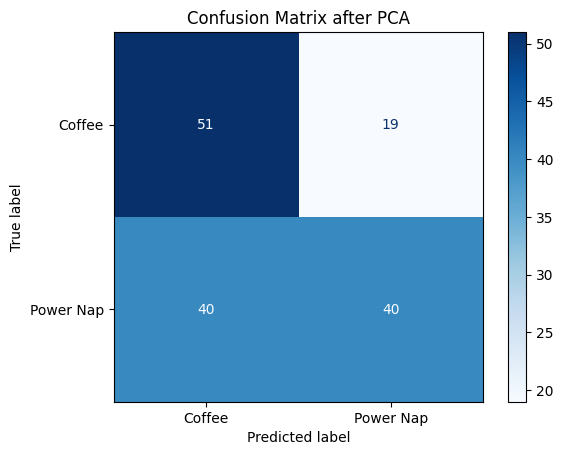

In [8]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Coffee", "Power Nap"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix after PCA")
plt.show()


Step 8: Visualizing PCA Result

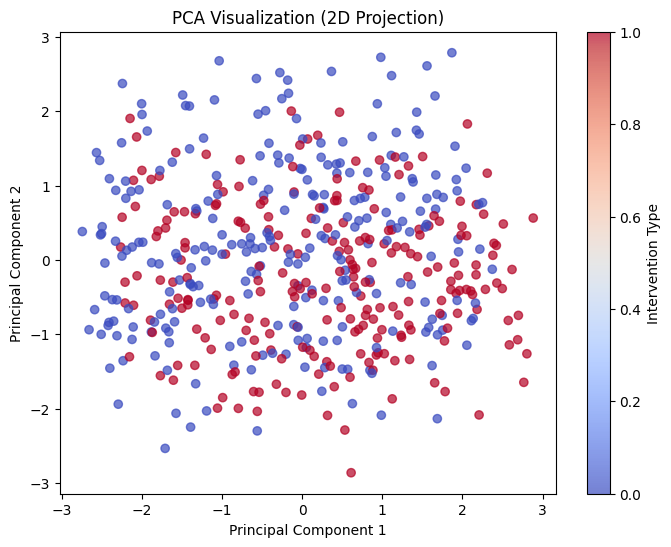

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization (2D Projection)")
plt.colorbar(label="Intervention Type")
plt.show()
